# Interactive Data Visualization with Python 

#### Revising my data visualization skills using python libraries such as Numpy, Pandas, Seaborn and Plotly and many more. 

### Step 1: Reading data from files

In [3]:
# 1. Import the necessary libraries
import pandas as pd
import seaborn as sb

#### Always view the dataset url in raw form and then copy the url if it is from github! 

In [19]:
# 2. Store the necessary url of the dataset in a variable
diamonds_url = "https://raw.githubusercontent.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/master/datasets/diamonds.csv"

In [20]:
# 3. Reading the data from url and putting it to the pandas dataframe
diamonds_df = pd.read_csv(diamonds_url)

In [11]:
# 4. Reading the data from url and putting it to the Seaborn dataframe
diamonds_dfs = sb.load_dataset('diamonds')

In [23]:
# 5. To read data from specific columns from the table then,
diamonds_df_specific = pd.read_csv(diamonds_url, usecols = ['carat','cut','color','clarity'])

### Step 2: Observing and Describing Data 

In [24]:
'''1. Now the dataset is loaded into a dataframe and we need to see the data before taking any decision

We can see the first few rows in a dataframe using head() function in pandas and it will show first 5 rows by default.
'''

diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### Cut, clarity and color are categorical variables that can take names as values and can be used to separate data based on them.

#### x, y, z, depth, table and price are continuous variables that take numbers as values. 

#### Getting unique values information 

In [27]:
# Categorical variables have limited number of variables and those can be seen using .nunique()
diamonds_df.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In [28]:
# To get unique values from specific column, mention the column
diamonds_df.color.nunique()

7

In [29]:
diamonds_df.clarity.nunique()

8

In [30]:
diamonds_df.cut.nunique()

5

In [31]:
# To get the number of rows and columns we can use shape function
diamonds_df.shape

(53940, 10)

In [32]:
# To get the necessary stats of the variables in a dataframe we can do it by
diamonds_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [33]:
# We can see that the stats are only defined for continous variable for categorical variables we can do it by include = object
diamonds_df.describe(include=object)

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [34]:
# To get the information of a dataframe and the memory that dataframe occupies we can do it by 
diamonds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


#### Selecting columns in a dataframe 

In [35]:
# We can access a specific column in a pandas dataframe using . operator or [] operator
diamonds_df.cut

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: object

In [36]:
diamonds_df['cut']

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: object

#### .operator cannot be used 

- If the column name contains spaces
- If the column name is an integer
- While creating a new column

#### Selecting columns from a DataFrame 

- We know that the dataframe has categorical variable column, if we had to categorize the data based on that we could do it by .loc function

- if we had to select all rows that had an ideal cut type and store it in a separate dataframe, we could do it by:

In [39]:
diamonds_ideal = diamonds_df.loc[diamonds_df['cut']=='Ideal']

In [40]:
diamonds_ideal.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
11,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46
13,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
16,0.30,Ideal,I,SI2,62.0,54.0,348,4.31,4.34,2.68
39,0.33,Ideal,I,SI2,61.8,55.0,403,4.49,4.51,2.78


---

### Step 3: Adding new columns to a dataframe 

- Let's say we want to add a column and the values in it are dependent on the other columns in the dataframe.
- For example: price per carat = price / carat
- To create a new column and add it to the dataframe we can do it by: 

#### If you restart your notebook redo all the steps from first 

In [3]:
import pandas as pd
import seaborn as sb

In [4]:
diamonds_url = "https://raw.githubusercontent.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/master/datasets/diamonds.csv"

In [5]:
diamonds_df = pd.read_csv(diamonds_url)

In [6]:
diamonds_df['price_per_carat']=diamonds_df['price']/diamonds_df['carat']

In [7]:
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161


- If we want to categorize the price based on some criteria then we can use np.where from numpy package 

In [8]:
# If price is less than 3500 put it as low and if it is above that then it is high
import numpy as np

diamonds_df['price_category'] = np.where(diamonds_df['price_per_carat']>3500,'High','Low')

In [9]:
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,price_category
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304,Low
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952,Low
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130,Low
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138,Low
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161,Low


In [10]:
diamonds_df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,price_category
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,3829.166667,High
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,3829.166667,High
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,3938.571429,High
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,3205.813953,Low
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64,3676.000000,High


#### Step 4: Applying functions to dataframe column 

- Let's say the price of diamonds have increased and we want to apply an increment factor of 1.3 to all the diamonds in our record then round it off accordingly

In [12]:
diamonds_df['price']=diamonds_df['price']*1.3

In [14]:
# To round it off we are using math library and ceil function in it
import math
diamonds_df['rounded_price']=diamonds_df['price'].apply(math.ceil)

In [15]:
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,price_category,rounded_price
0,0.23,Ideal,E,SI2,61.5,55.0,423.8,3.95,3.98,2.43,1417.391304,Low,424
1,0.21,Premium,E,SI1,59.8,61.0,423.8,3.89,3.84,2.31,1552.380952,Low,424
2,0.23,Good,E,VS1,56.9,65.0,425.1,4.05,4.07,2.31,1421.739130,Low,426
3,0.29,Premium,I,VS2,62.4,58.0,434.2,4.20,4.23,2.63,1151.724138,Low,435
4,0.31,Good,J,SI2,63.3,58.0,435.5,4.34,4.35,2.75,1080.645161,Low,436


- In this case you had the built-in function but if you didn't have it then you must write your own function and that is user defined function, in this case we can use lambda function to do the above process.  

In [25]:
import math

def get_round_ceil(x):
    y = math.ceil(x/100)*100
    return y

In [26]:
# We have made our own function now
diamonds_df['rounded_price']=diamonds_df['price'].apply(get_round_ceil)

In [27]:
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,price_category,rounded_price
0,0.23,Ideal,E,SI2,61.5,55.0,423.8,3.95,3.98,2.43,1417.391304,Low,500
1,0.21,Premium,E,SI1,59.8,61.0,423.8,3.89,3.84,2.31,1552.380952,Low,500
2,0.23,Good,E,VS1,56.9,65.0,425.1,4.05,4.07,2.31,1421.739130,Low,500
3,0.29,Premium,I,VS2,62.4,58.0,434.2,4.20,4.23,2.63,1151.724138,Low,500
4,0.31,Good,J,SI2,63.3,58.0,435.5,4.34,4.35,2.75,1080.645161,Low,500


- I personally didn't like this rounding system, if i wanted it to round off to next decimal I would do it by

In [28]:
import math

def get_round(x):
    y =  math.ceil(x/1)*1
    return y

In [30]:
diamonds_df['next_round']=diamonds_df['price'].apply(get_round)

In [31]:
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,price_category,rounded_price,next_round
0,0.23,Ideal,E,SI2,61.5,55.0,423.8,3.95,3.98,2.43,1417.391304,Low,500,424
1,0.21,Premium,E,SI1,59.8,61.0,423.8,3.89,3.84,2.31,1552.380952,Low,500,424
2,0.23,Good,E,VS1,56.9,65.0,425.1,4.05,4.07,2.31,1421.739130,Low,500,426
3,0.29,Premium,I,VS2,62.4,58.0,434.2,4.20,4.23,2.63,1151.724138,Low,500,435
4,0.31,Good,J,SI2,63.3,58.0,435.5,4.34,4.35,2.75,1080.645161,Low,500,436


### Step 5: Applying Functions on multiple columns

- Let'say we have a scenario where the customer is looking for D colored diamonds with ideal set, to set the criteria as yes or no we can do it by:

In [33]:
# We can do boolean operation with those criteria's
def desired(x):
    res = 'Yes' if(x['cut']=='Ideal' and x['color']=='D') else 'No'
    return res

In [37]:
diamonds_df_client = diamonds_df

In [42]:
diamonds_df_client['desired'] = diamonds_df_client.apply(desired, axis=1) # axis = 0 for rows, axis = 1 for columns

In [55]:
diamonds_df_client.tail(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,price_category,rounded_price,next_round,desired
53930,0.71,Premium,E,SI1,60.5,55.0,3582.8,5.79,5.74,3.49,3881.690141,High,3600,3583,No
53931,0.71,Premium,F,SI1,59.8,62.0,3582.8,5.74,5.73,3.43,3881.690141,High,3600,3583,No
53932,0.70,Very Good,E,VS2,60.5,59.0,3584.1,5.71,5.76,3.47,3938.571429,High,3600,3585,No
53933,0.70,Very Good,E,VS2,61.2,59.0,3584.1,5.69,5.72,3.49,3938.571429,High,3600,3585,No
53934,0.72,Premium,D,SI1,62.7,59.0,3584.1,5.69,5.73,3.58,3829.166667,High,3600,3585,No
53935,0.72,Ideal,D,SI1,60.8,57.0,3584.1,5.75,5.76,3.50,3829.166667,High,3600,3585,Yes
53936,0.72,Good,D,SI1,63.1,55.0,3584.1,5.69,5.75,3.61,3829.166667,High,3600,3585,No
53937,0.70,Very Good,D,SI1,62.8,60.0,3584.1,5.66,5.68,3.56,3938.571429,High,3600,3585,No
53938,0.86,Premium,H,SI2,61.0,58.0,3584.1,6.15,6.12,3.74,3205.813953,Low,3600,3585,No
53939,0.75,Ideal,D,SI2,62.2,55.0,3584.1,5.83,5.87,3.64,3676.000000,High,3600,3585,Yes


### Step 6: Deleting columns from a dataframe 

- Let's say we want to remove the rounded off price columns from the dataframe then:

In [56]:
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,price_category,rounded_price,desired
0,0.23,Ideal,E,SI2,61.5,55.0,423.8,3.95,3.98,2.43,1417.391304,Low,500,No
1,0.21,Premium,E,SI1,59.8,61.0,423.8,3.89,3.84,2.31,1552.380952,Low,500,No
2,0.23,Good,E,VS1,56.9,65.0,425.1,4.05,4.07,2.31,1421.739130,Low,500,No
3,0.29,Premium,I,VS2,62.4,58.0,434.2,4.20,4.23,2.63,1151.724138,Low,500,No
4,0.31,Good,J,SI2,63.3,58.0,435.5,4.34,4.35,2.75,1080.645161,Low,500,No


In [57]:
# We can use drop function to remove the column
diamonds_df = diamonds_df.drop(columns=['rounded_price'])

In [60]:
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,price_category,desired
0,0.23,Ideal,E,SI2,61.5,55.0,423.8,3.95,3.98,2.43,1417.391304,Low,No
1,0.21,Premium,E,SI1,59.8,61.0,423.8,3.89,3.84,2.31,1552.380952,Low,No
2,0.23,Good,E,VS1,56.9,65.0,425.1,4.05,4.07,2.31,1421.739130,Low,No
3,0.29,Premium,I,VS2,62.4,58.0,434.2,4.20,4.23,2.63,1151.724138,Low,No
4,0.31,Good,J,SI2,63.3,58.0,435.5,4.34,4.35,2.75,1080.645161,Low,No


### Step 7: Writing a dataframe to a file

- Let's say we have to write all the data to a csv file, we can do it by to_csv()

In [61]:
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,price_category,desired
0,0.23,Ideal,E,SI2,61.5,55.0,423.8,3.95,3.98,2.43,1417.391304,Low,No
1,0.21,Premium,E,SI1,59.8,61.0,423.8,3.89,3.84,2.31,1552.380952,Low,No
2,0.23,Good,E,VS1,56.9,65.0,425.1,4.05,4.07,2.31,1421.739130,Low,No
3,0.29,Premium,I,VS2,62.4,58.0,434.2,4.20,4.23,2.63,1151.724138,Low,No
4,0.31,Good,J,SI2,63.3,58.0,435.5,4.34,4.35,2.75,1080.645161,Low,No


In [62]:
diamonds_df.to_csv('diamonds.csv')

In [63]:
print(diamonds_df.head())

   carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0  423.8  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0  423.8  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0  425.1  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0  434.2  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0  435.5  4.34  4.35  2.75   

   price_per_carat price_category desired  
0      1417.391304            Low      No  
1      1552.380952            Low      No  
2      1421.739130            Low      No  
3      1151.724138            Low      No  
4      1080.645161            Low      No  


- If you want to exclude the row numbers just use index=False

---

### Step 8: Plotting and analyzing a histogram 

- There are many libraries in python that are used to make some plots with data, there popular libraries in python are matplotlib seaborn and plotly. Seaborn will be used here.

#### Histogram

- This is a feature on the plot that has range of features on x-axis and the count of data points on the y-axis.

In [1]:
# Importing the libraries
import pandas as pd
import seaborn as sb

In [4]:
# Import the diamonds data from seaborn
diamonds_df = sb.load_dataset('diamonds')

array([[<AxesSubplot:title={'center':'carat'}>]], dtype=object)

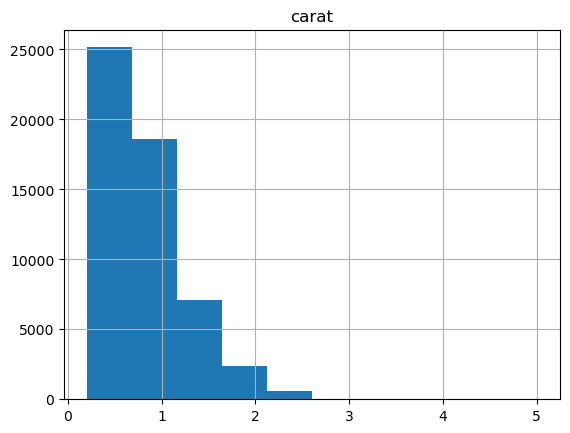

In [5]:
# Plotting a histogram using diamonds dataset where x axis is carat
diamonds_df.hist(column='carat')

- The hist function has a parameter called bins, that determines in how many equally sized bins that the data points are divided, by default the parameter is set to 10 in pandas and we can alter it if we want to.

array([[<AxesSubplot:title={'center':'carat'}>]], dtype=object)

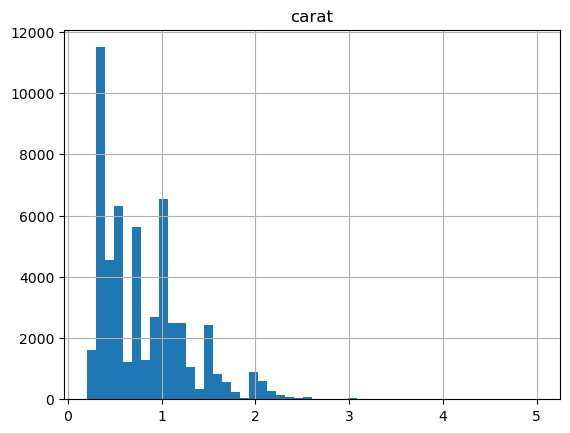

In [6]:
diamonds_df.hist(column=['carat'], bins=50)

- In the above piece of code we split the carat criteria into 50 equal parts.

- If this has to be done in seaborn then we can do it by 

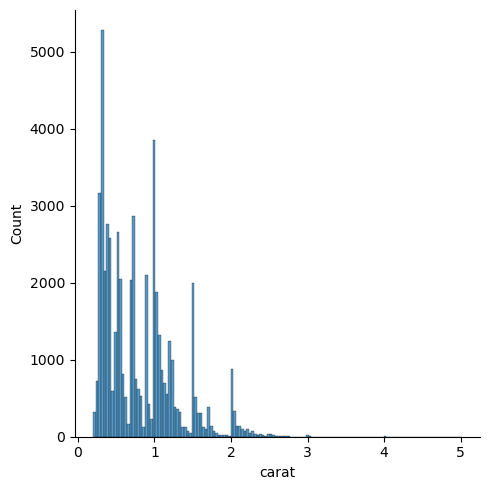

In [12]:
import pandas as pd
import seaborn as sb
diamonds_df = sb.load_dataset('diamonds')
sb.displot(diamonds_df.carat)

- To remove the displot wave, that is formed by kernel density estimation. we can do it by adding kde = false

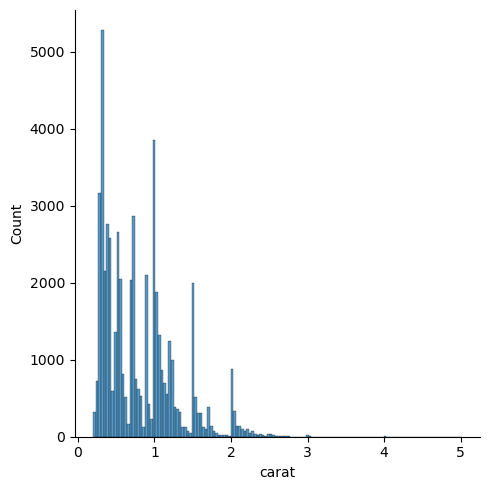

In [13]:
sb.displot(diamonds_df.carat, kde=False)

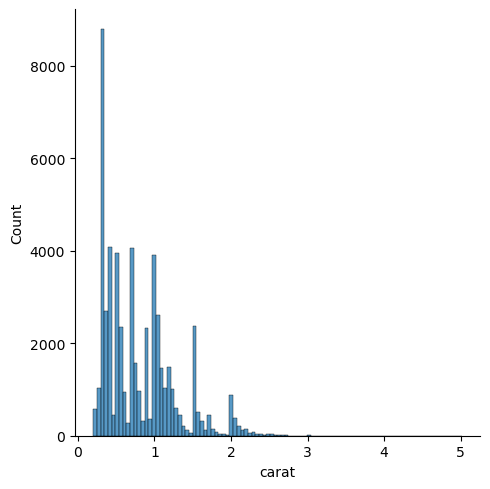

In [15]:
sb.displot(diamonds_df.carat, kde=False, bins=100)

- We can notice that the lower carat counts are high in numbers and higher carat numbers are low in numbers, just like luxury cars

- A log transformation helps in identifying more trends, this gives us better clarity.

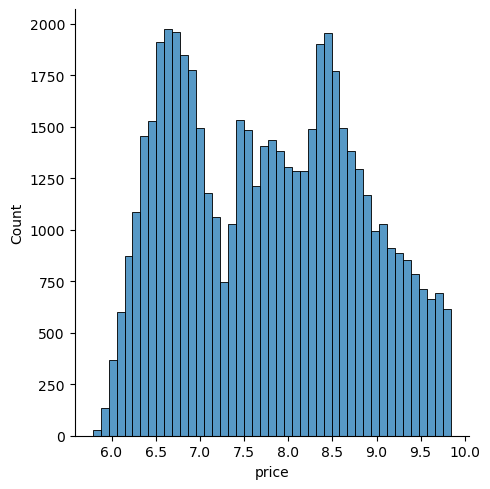

In [17]:
import numpy as np
sb.displot(np.log(diamonds_df.price),kde=False)